In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from environment import k_BanditGame
from agent import SimpleAgent


In [25]:
def experiment_run(env, agent, n_steps = 1000):
    rewards = np.zeros(n_steps, dtype=np.float64)
    actions = np.zeros(n_steps, dtype=np.float64)
    obs, info = env.reset()
    for step in range(0, n_steps):
        action = agent.get_action(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        agent.update(obs, action, reward, terminated, truncated)
        rewards[step] = reward
        actions[step] = (action == env.get_winning_arm())
    return actions, rewards

In [26]:
def experiment(epsilon = 0.0, n_runs=2000, n_step=1000):
    total_rewards = np.zeros(n_step, dtype=np.float64)
    total_optimal_actions = np.zeros(n_step, dtype=np.float64)
    for run in range(n_runs):
        game = k_BanditGame()
        agent = SimpleAgent(game, epsilon=epsilon)
        optimal_actions, reward = experiment_run(game, agent, n_step)
        total_rewards += reward
        total_optimal_actions += optimal_actions
    return total_optimal_actions / n_runs,  total_rewards / n_runs
    

In [27]:
greedy_optimal_actions, greedy_rewards = experiment()

In [28]:
eps_1_optimal_actions, eps_1_reward  = experiment(epsilon=0.1)

In [29]:
eps_2_optimal_actions, eps_2_reward  = experiment(epsilon=0.01)

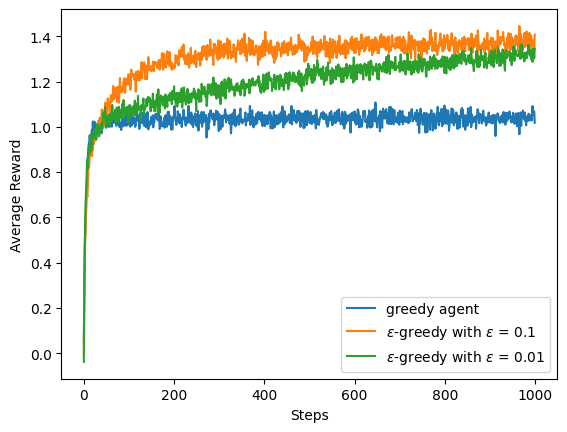

In [30]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(greedy_rewards, label="greedy agent")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()

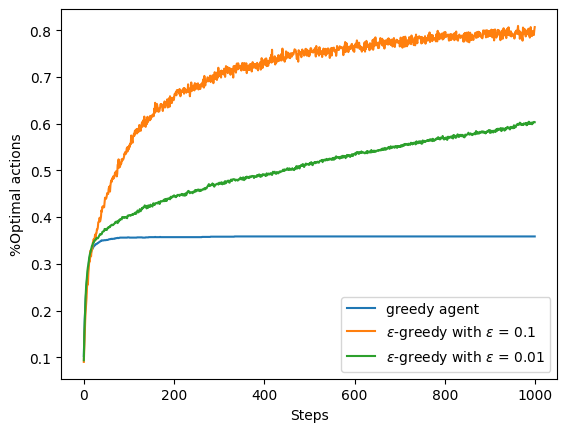

In [31]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(greedy_optimal_actions, label="greedy agent")
plt.plot(eps_1_optimal_actions, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_optimal_actions, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()